In [24]:
from datagen import DataGenerator
from fineNeat import Ind
# from fineNeat.sneat_jax import act
from jax import numpy as jnp 
from tune import train_params

generator = DataGenerator(train_size=2000, batch_size=1000)
choice_id = 3
nInput = 2
nOutput = 2 

train_data, test_data = generator.generate_random_dataset(choice=choice_id)  # 0 for circle dataset

ind = Ind.from_shapes([(nInput, 5), (5, 5), (5, nOutput)])
ind.express()

wMat = jnp.copy(ind.wMat)
aVec = jnp.array(ind.aVec)

config_dict = {0: (0.01, 400), 1: (0.01, 400), 2: (0.01, 400), 3: (0.001, 1600)} # circle dataset use 0.01
learning_rate, n_epochs = config_dict[choice_id]

wMat, loss_value = train_params(wMat, aVec, nInput, nOutput, train_data, generator, learning_rate=learning_rate, n_epochs=n_epochs, interval=10)

Epoch 1, Loss: 0.3324730396270752
Epoch 11, Loss: 0.3214828670024872
Epoch 21, Loss: 0.32688722014427185
Epoch 31, Loss: 0.3407316505908966
Epoch 41, Loss: 0.3303130865097046
Epoch 51, Loss: 0.33573246002197266
Epoch 61, Loss: 0.3089246451854706
Epoch 71, Loss: 0.3158239424228668
Epoch 81, Loss: 0.3206746578216553
Epoch 91, Loss: 0.33091428875923157
Epoch 101, Loss: 0.30975019931793213
Epoch 111, Loss: 0.32125380635261536
Epoch 121, Loss: 0.3116227090358734
Epoch 131, Loss: 0.30379945039749146
Epoch 141, Loss: 0.30227386951446533
Epoch 151, Loss: 0.29856371879577637
Epoch 161, Loss: 0.2959722578525543
Epoch 171, Loss: 0.301284521818161
Epoch 181, Loss: 0.29883718490600586
Epoch 191, Loss: 0.3171416223049164
Epoch 201, Loss: 0.3074718117713928
Epoch 211, Loss: 0.2959973216056824
Epoch 221, Loss: 0.2937016487121582
Epoch 231, Loss: 0.29659175872802734
Epoch 241, Loss: 0.3052945137023926
Epoch 251, Loss: 0.30529165267944336
Epoch 261, Loss: 0.3083677589893341
Epoch 271, Loss: 0.2999502122

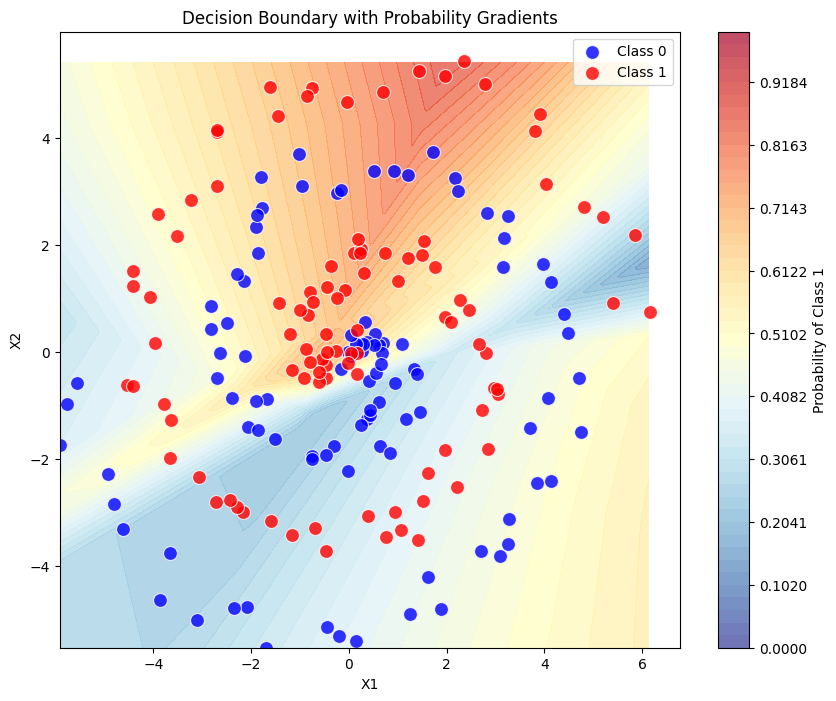

In [25]:
from viz import plot_decision_boundary
plot_decision_boundary(wMat, aVec, nInput, nOutput, test_data)

NEAT-backprop training on classification dataset

In [1]:
# Two Stage Training: topology search with NEAT, weight search with backprop (essentially replacing SNeat)
# - for simplicity, let's pick best few species at the end of NEAT stage, and do backprop on them, then select the best one and propagate into NEAT stage to do further search 
# - this way we reduce the workload a bit and have a more clear separation between the stages ... since we know SNeat works well for SlimeVolleyBall 


from fineNeat import Neat 
from fineNeat import loadHyp, updateHyp, load_cls_task

hyp_default = '../fineNeat/fineNeat/p/cls.json'
hyp_adjust = '../fineNeat/fineNeat/p/cls_neat.json'
fileName = "cls"

hyp = loadHyp(pFileName=hyp_default, load_task=load_cls_task)
updateHyp(hyp,load_cls_task,hyp_adjust)

neat = Neat(hyp)

In [4]:
neat.initPop()
pop = neat.ask()

In [ ]:
# get reward value for each individual 
